In [1]:
import pandas as pd
import scipy as sp
import numpy as np

from abtools.bayesian import LognormalABModel, WaldABModel
from abtools.plotting import qqplot, ppplot

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('data.csv').query('revenue > 0')

In [3]:
log_data = np.log(data.revenue)

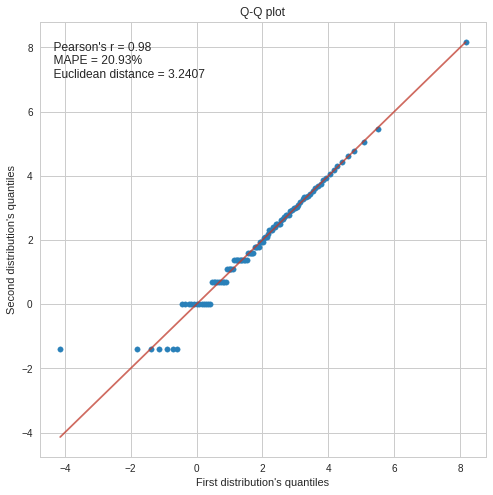

In [5]:
qqplot(sp.stats.norm(log_data.mean(), log_data.std()).rvs(10000), log_data, num_points=100)[0]

In [6]:
a = data.query('abgroup == "control"')['revenue']
b = data.query('abgroup == "test"')['revenue']

In [7]:
ln_model = LognormalABModel(a, b)
ln_model.fit()

         Current function value: 395986.472310
         Iterations: 9
         Function evaluations: 113
         Gradient evaluations: 102


100%|██████████| 10000/10000 [00:15<00:00, 627.56it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e6cf791d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f7e6cecf908>], dtype=object)

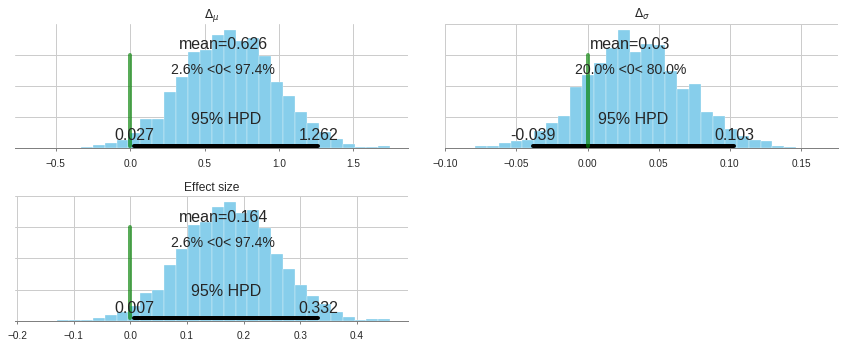

In [8]:
ln_model.plot_deltas()

In [9]:
ln_model.summary()

,mean,sd,mc_error,hpd_2.5,hpd_97.5
$\mu_{ln(A)}$,1.833804,0.006794,0.000178,1.821733,1.848514
$\mu_{ln(B)}$,1.841707,0.006709,0.000162,1.828601,1.854694
$\tau_A$,0.400714,0.002476,0.000060,0.396050,0.405802
$\tau_B$,0.394265,0.002422,0.000071,0.389782,0.399142
$\mu_A$,21.794876,0.219270,0.005362,21.368092,22.216505
$\mu_B$,22.420762,0.227427,0.005755,21.953073,22.848554
$A_{\sigma^2}$,14.406801,0.195675,0.005122,14.051028,14.824456
$B_{\sigma^2}$,14.636283,0.196389,0.004740,14.256343,15.020072
$\Delta_{\mu}$,0.625885,0.316037,0.007676,0.026967,1.262490
$\Delta_{\sigma}$,0.030112,0.035914,0.000967,-0.038617,0.102875


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e6cbe24a8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f7e6cb3e3c8>], dtype=object)

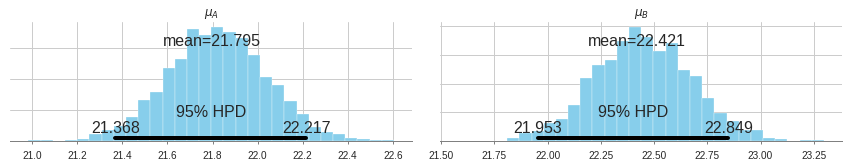

In [10]:
ln_model.plot_params()